EDA realisation plan by Alex Lvov
1. Data Load and inspection
2. Data quality inspection
3. Data quality visualisation
4. Resulting visualisation and analysis
5. Resulting explanation

In [ ]:
# 1) Data Load and inspection 
# Importing Pandas for loading data
import pandas as pd
housing = pd.read_csv("housing.csv")

print("intial info about housing")
housing.info()

print("info about info about the dataframe using shape method")
housing.shape




intial info about housing
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
info about info about the dataframe using shape method


(20640, 10)

In [ ]:
#2) Data quality assessment
#2.1) Missing values 
# isnull() is an alias of isna() so we dont need to think if we should check for empty values, nulls or both like in e.g. Java.
print("Missing values ammounts to 207 rows and are all in the 'total_bedrooms' column.")
housing.isnull().sum()


missing values ammounts to 207 rows and are all in the 'total_bedrooms' column


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
#2.2) Some statisitics useful for data quality assessment 
#There is a convenient describe() function which computes a variety of summary statistics about a Series or the columns of a DataFrame (excluding NAs of course):
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [41]:
#2.3) Do we have any duplicate rows? Sum them up if they exist. But they dont so we print zero.
housing.duplicated().sum()

np.int64(0)

C:\Users\alexa\AppData\Local\Temp\ipykernel_568\611045362.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_ocean = housing.groupby('ocean_proximity').apply(


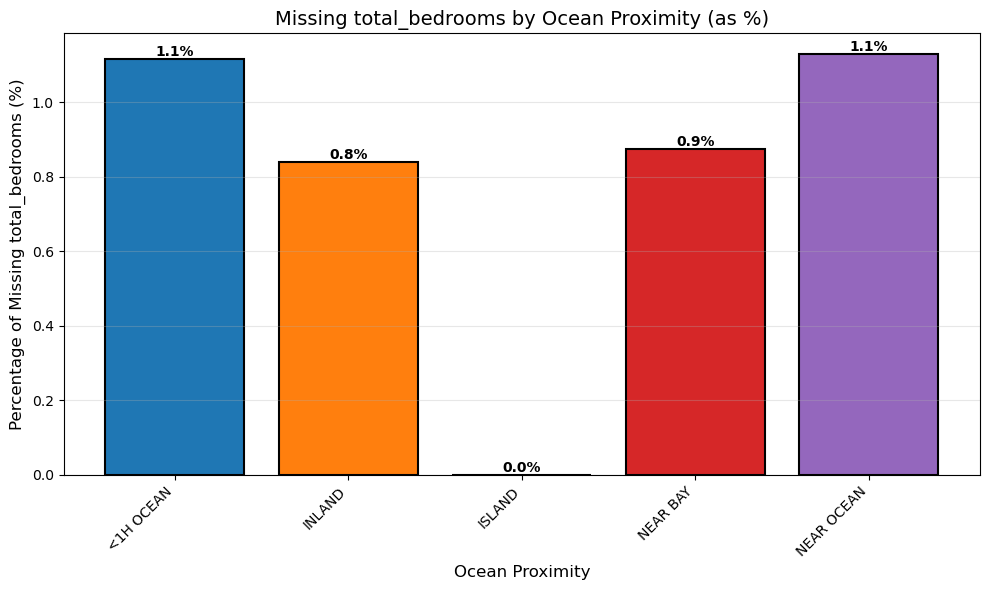

In [43]:
# 3) Data quality Visualization (missing data in total_bedrooms by ocean_proximity)
import numpy as np
import matplotlib.pyplot as plt

# Calculate percentage of missing total_bedrooms by ocean_proximity
missing_by_ocean = housing.groupby('ocean_proximity').apply(
    lambda x: (x['total_bedrooms'].isnull().sum() / len(x)) * 100
).sort_index()

# Define colors for each ocean_proximity category
tab10_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
color_map = {cat: tab10_colors[i] for i, cat in enumerate(missing_by_ocean.index)}
colors = [color_map[cat] for cat in missing_by_ocean.index]

# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(missing_by_ocean.index, missing_by_ocean.values, color=colors, edgecolor='black', linewidth=1.5)
plt.xlabel('Ocean Proximity', fontsize=12)
plt.ylabel('Percentage of Missing total_bedrooms (%)', fontsize=12)
plt.title('Missing total_bedrooms by Ocean Proximity (as %)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


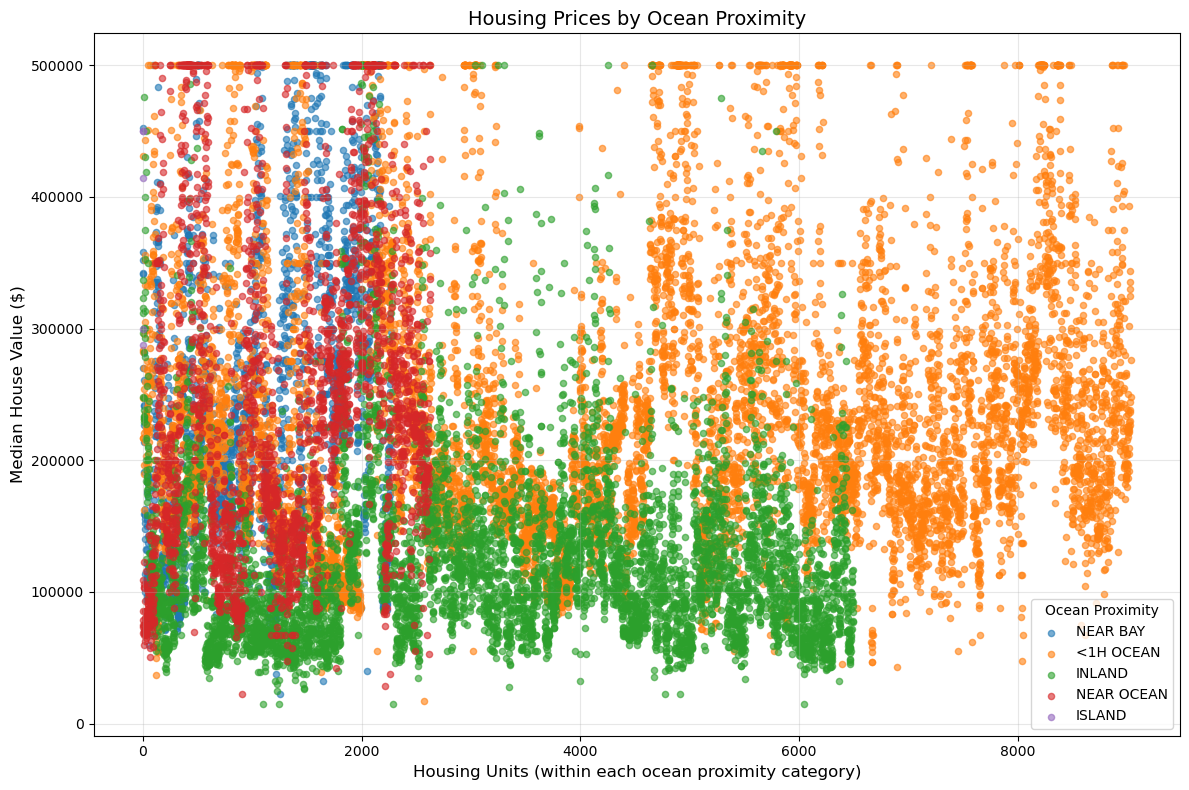


Price statistics by Ocean Proximity:
                          mean       min       max
ocean_proximity                                   
<1H OCEAN        240267.990812   17500.0  500001.0
INLAND           124896.863147   14999.0  500001.0
ISLAND           380440.000000  287500.0  450000.0
NEAR BAY         259279.292070   22500.0  500001.0
NEAR OCEAN       249042.355023   22500.0  500001.0


In [42]:
#) 4) Resulting visualisation and analysis
# Remove rows with missing values
housing_clean = housing.dropna()

# Define colors for each ocean_proximity category
tab10_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
ocean_cats = housing_clean['ocean_proximity'].unique()
color_map = {cat: tab10_colors[i] for i, cat in enumerate(ocean_cats)}

# Create scatter plot
plt.figure(figsize=(12, 8))

for cat in ocean_cats:
    data = housing_clean[housing_clean['ocean_proximity'] == cat]
    plt.scatter(range(len(data)), data['median_house_value'], 
                c=color_map[cat], label=cat, alpha=0.6, s=20)

plt.xlabel('Housing Units (within each ocean proximity category)', fontsize=12)
plt.ylabel('Median House Value ($)', fontsize=12)
plt.title('Housing Prices by Ocean Proximity', fontsize=14)
plt.legend(title='Ocean Proximity', loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Summary statistics
print("\nPrice statistics by Ocean Proximity:")
print(housing_clean.groupby('ocean_proximity')['median_house_value'].describe()[['mean', 'min', 'max']])


5) Results explanation: I have decided to focus on the question if the ocean proximity can be major guiding factor to the pricing. The answer is no, not really, as one can see on the final scatter plot. Although the cheapest (defined as lowest starting prices) properties are on the Inland. And the most lucrative ocean proximity (island, near bay, near ocean) have the highest starting prices. Missing data share of each category turned out to be comparable to the others too, that is around 1%.

# Självutvärderingen
1. ### Har något varit utmanande i kursen/kunskapskontrollerna? Om ja, hur har duhanterat det? Vilka lärdomar tar du med dig till framtida kurser?

Det har varit utmanade att jobba med logik som motsvarar matriser och ekvationer.

2. ### Vilket betyg anser du att du ska ha och varför?

Jag anser att jag ska få G lr VG beroende på var tyngdpunkten ligger.

3. ### Något du vill lyfta fram till Terese?

Det mesta har varit bra. Det enda mindre bra jag kan tänka mig är att jag har svårt att se en anledning att sätta deadline till fredag kväll om man kan sätta det till söndag kväll, men det gick att komma överrens om så ingen stor grej.